In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.pandas.set_option('display.max_columns',None)

In [ ]:
LR= LinearRegression()
OE= OrdinalEncoder
SS= StandardScaler
TTS= train_test_split
MMS= MinMaxScaler
LE= LabelEncoder

In [ ]:
BankChurners= pd.read_csv('BankChurners.csv')

In [ ]:
BankChurners.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
BankChurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
BankChurners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
BankChurners.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
BankChurners.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis =1, inplace =True)

In [ ]:
BankChurners.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
sampledata= BankChurners.select_dtypes(['int', 'float']).columns

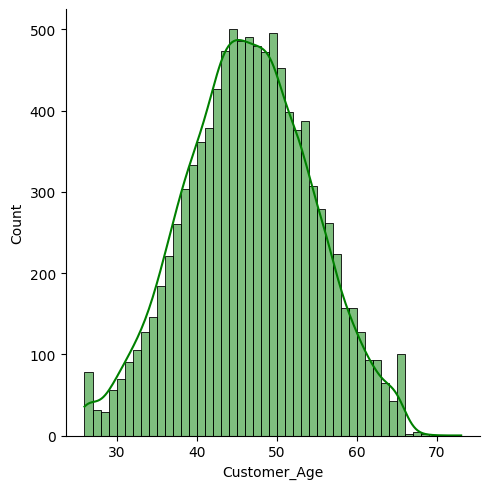

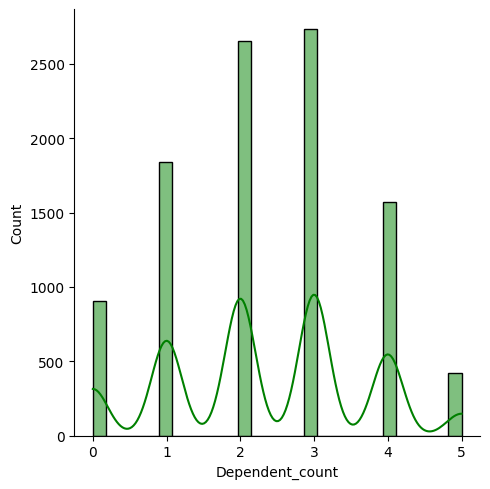

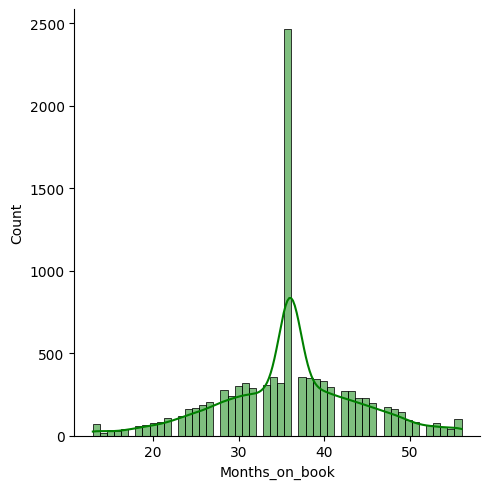

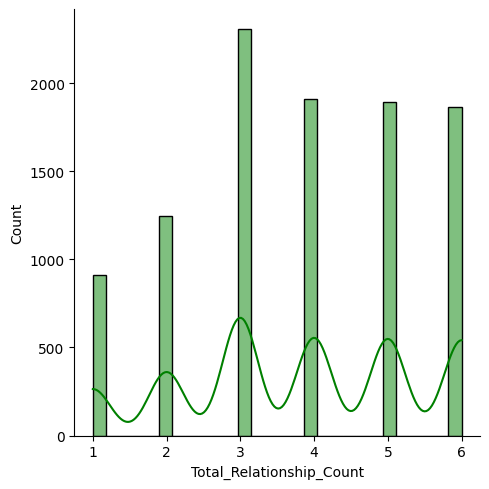

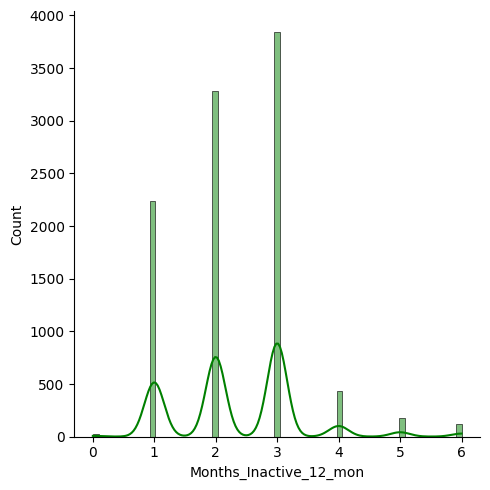

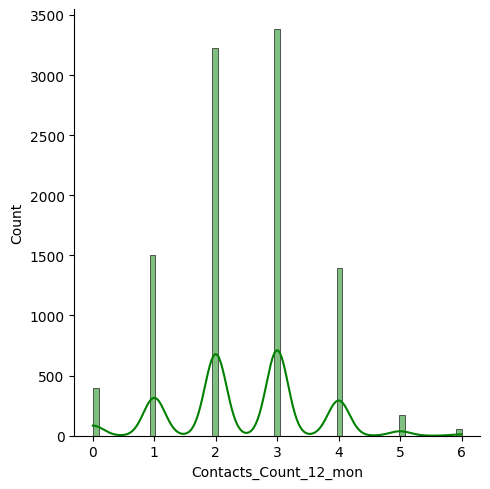

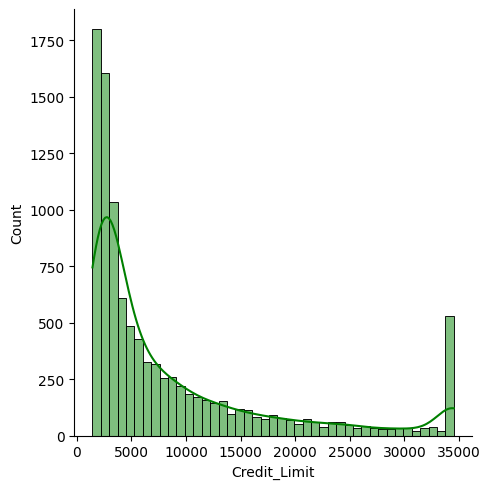

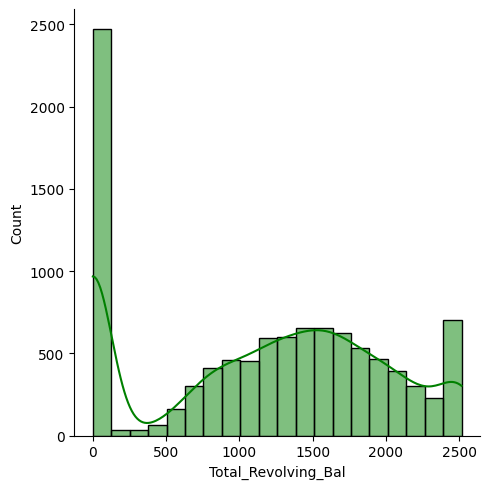

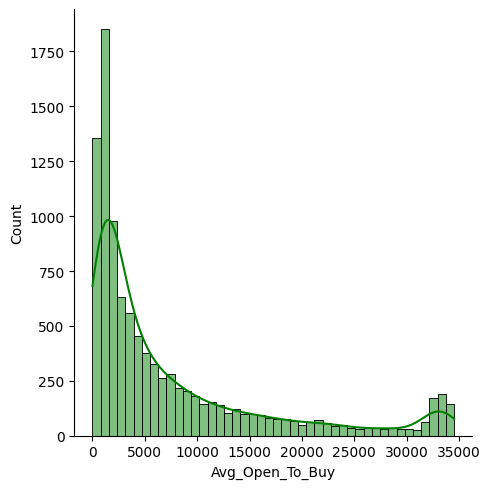

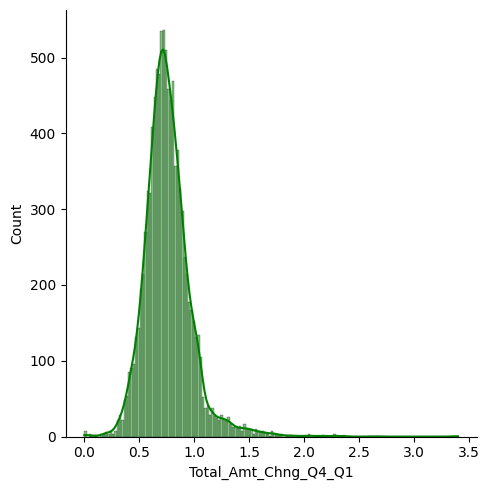

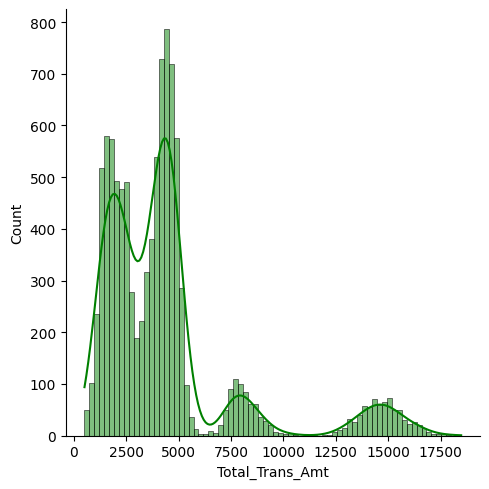

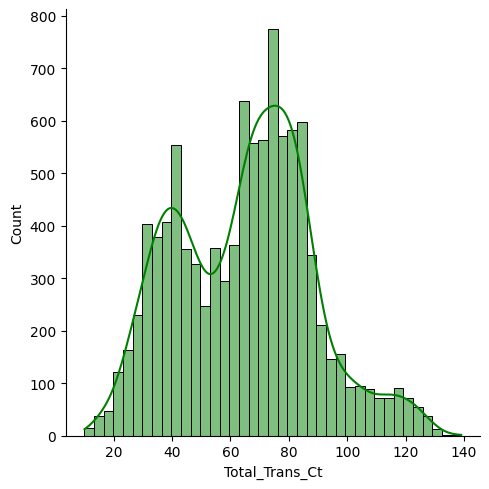

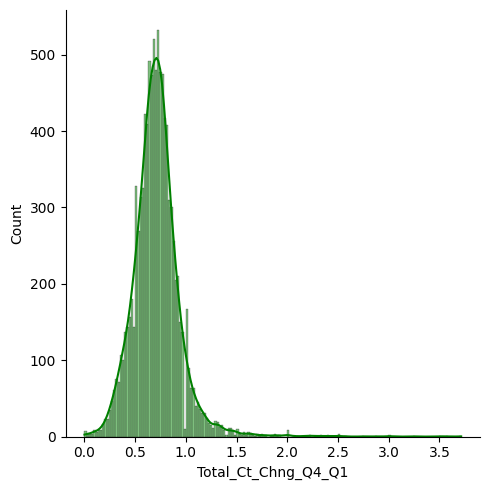

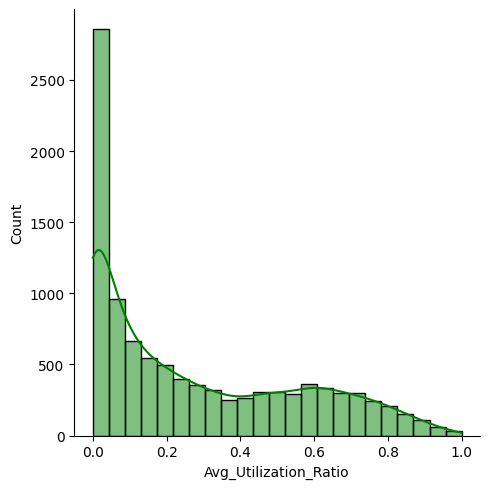

In [ ]:
for i in sampledata:
  sns.displot(BankChurners[i], color='Green', kde=True)
  plt.show()

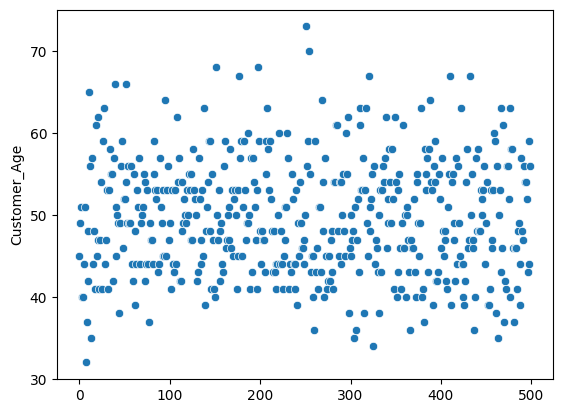

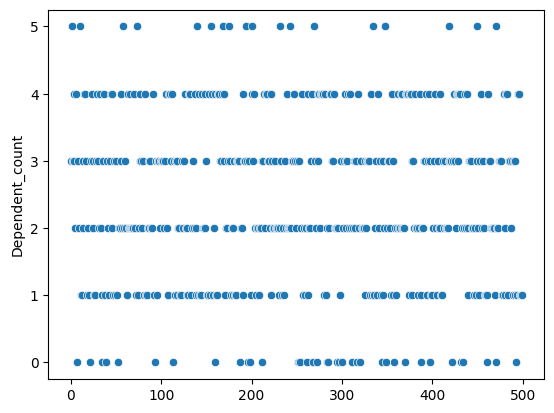

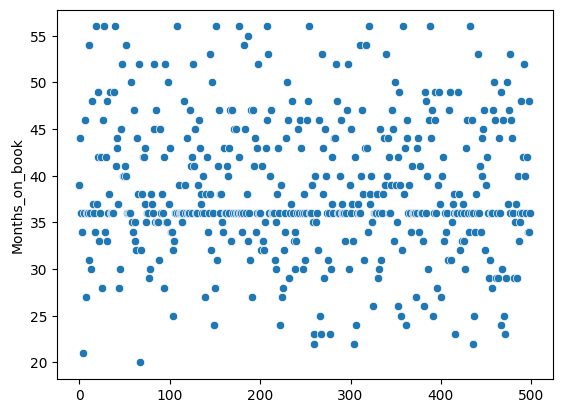

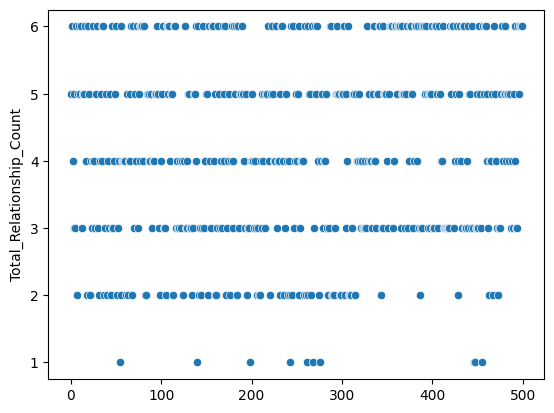

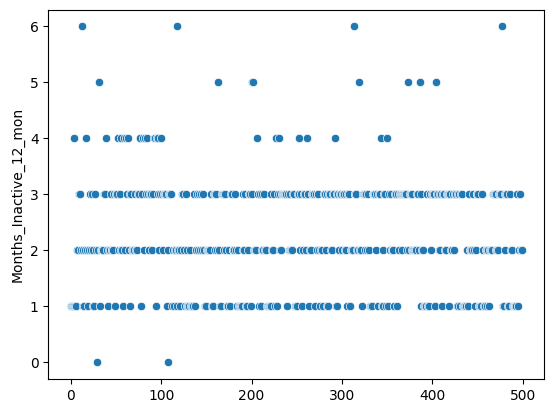

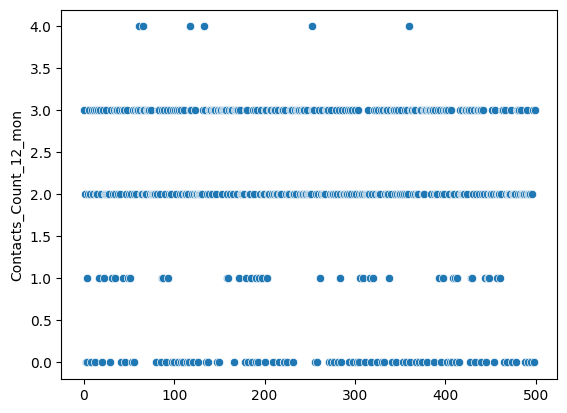

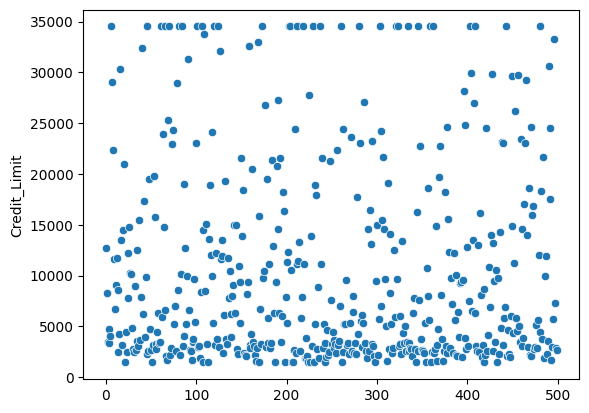

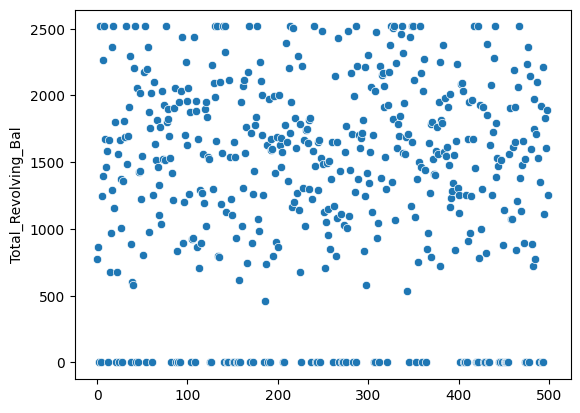

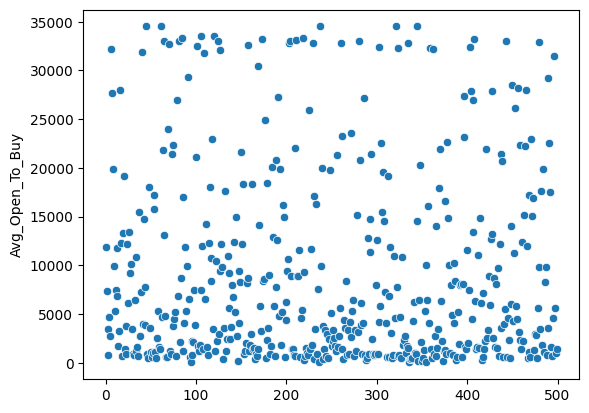

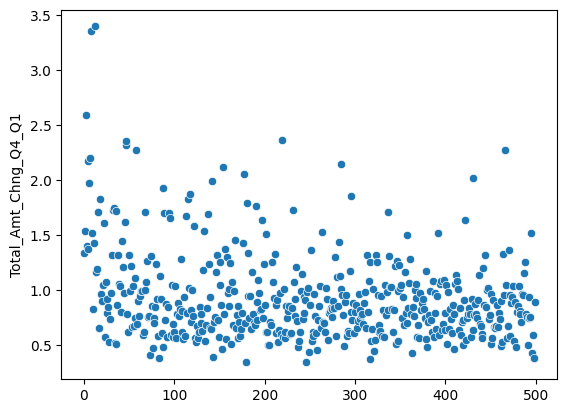

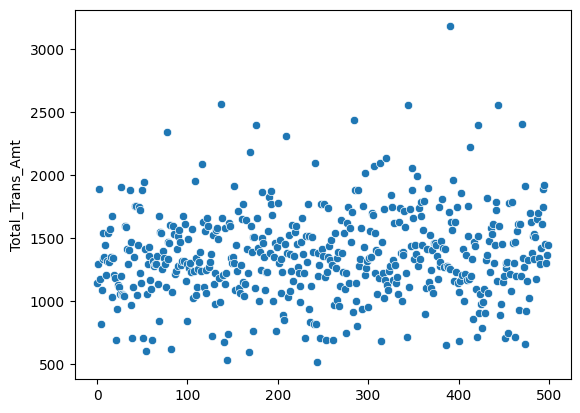

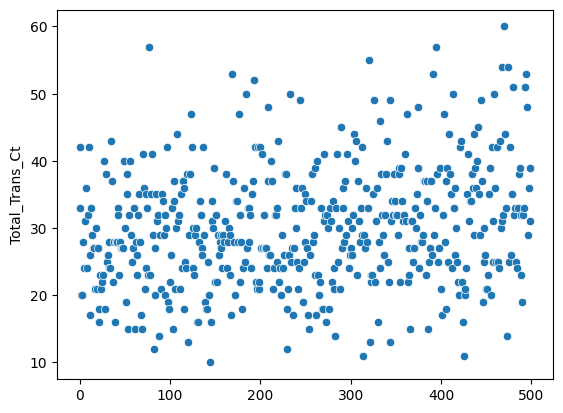

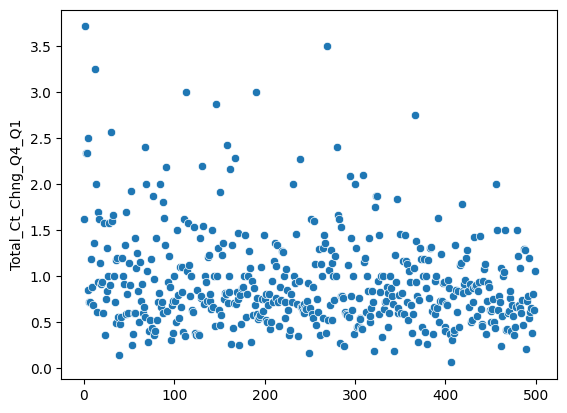

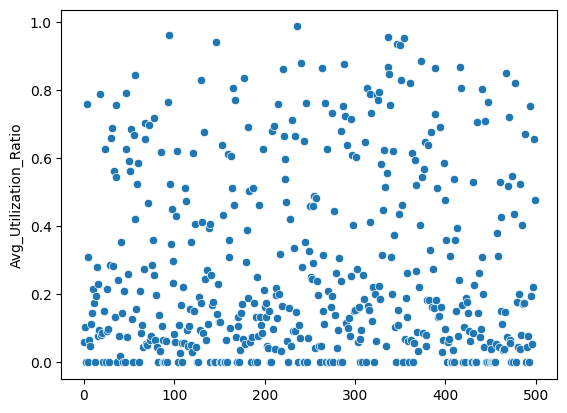

In [ ]:
for i in sampledata:
  sns.scatterplot(BankChurners.iloc[0:500,:], x= range(500), y=i)
  plt.show()

In [ ]:
BankChurners['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
BankChurners['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
#encodin- changing into 1 and 0 , scaling
BankChurners.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
BankChurners['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
BankChurners['Gender']= BankChurners['Gender'].map({'M': 1, 'F': 0})
BankChurners['Attrition_Flag']= BankChurners['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [ ]:
BankChurners.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [ ]:
OE= OrdinalEncoder()
LE= LabelEncoder()

In [ ]:
BankChurners[['Card_Category']]= OE.fit_transform(BankChurners[['Card_Category']])

In [ ]:
#BankChurners['Card_Category']= LE.fit_transform(BankChurners['Card_Category'])
#BankChurners['Marital_Status']= LE.fit_transform(BankChurners['Marital_Status'])
#BankChurners['Income_Category']= LE.fit_transform(BankChurners['Income_Category'])
#BankChurners['Education_Level']= LE.fit_transform(BankChurners['Education_Level'])

In [ ]:
#probablity ratio encoding
Education_Level= BankChurners.groupby('Education_Level')['Attrition_Flag'].mean().to_dict()
Education_Level

{'College': 0.8479763079960513,
 'Doctorate': 0.7893569844789357,
 'Graduate': 0.844309462915601,
 'High School': 0.8479880774962743,
 'Post-Graduate': 0.8217054263565892,
 'Uneducated': 0.8406186953597848,
 'Unknown': 0.8314680710994075}

In [ ]:
BankChurners['Education_Level']= BankChurners['Education_Level'].map(Education_Level)
BankChurners['Education_Level']

0        0.847988
1        0.844309
2        0.844309
3        0.847988
4        0.840619
           ...   
10122    0.844309
10123    0.831468
10124    0.847988
10125    0.844309
10126    0.844309
Name: Education_Level, Length: 10127, dtype: float64

In [ ]:
Income_Category= BankChurners.groupby('Income_Category')['Attrition_Flag'].mean().to_dict()
Income_Category

{'$120K +': 0.8266850068775791,
 '$40K - $60K': 0.8486033519553072,
 '$60K - $80K': 0.8651925820256776,
 '$80K - $120K': 0.8423452768729641,
 'Less than $40K': 0.8281381634372368,
 'Unknown': 0.8318345323741008}

In [ ]:
BankChurners['Income_Category']= BankChurners['Income_Category'].map(Income_Category)
BankChurners['Income_Category']

0        0.865193
1        0.828138
2        0.842345
3        0.828138
4        0.865193
           ...   
10122    0.848603
10123    0.848603
10124    0.828138
10125    0.848603
10126    0.828138
Name: Income_Category, Length: 10127, dtype: float64

In [ ]:
#one_hot
BankChurners = pd.get_dummies(BankChurners, columns=['Marital_Status'], drop_first=True)
BankChurners

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,1,3,0.847988,0.865193,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0
1,1,49,0,5,0.844309,0.828138,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0
2,1,51,1,3,0.844309,0.842345,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0
3,1,40,0,4,0.847988,0.828138,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1
4,1,40,1,3,0.840619,0.865193,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,0.844309,0.848603,0.0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,1,0
10123,0,41,1,2,0.831468,0.848603,0.0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,0,0
10124,0,44,0,1,0.847988,0.828138,0.0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,0,0
10125,0,30,1,2,0.844309,0.848603,0.0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0,0,1


In [ ]:
BankChurners.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
10122,1,50,1,2,0.844309,0.848603,0.0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,1,0
10123,0,41,1,2,0.831468,0.848603,0.0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,0,0
10124,0,44,0,1,0.847988,0.828138,0.0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,0,0
10125,0,30,1,2,0.844309,0.848603,0.0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0,0,1
10126,0,43,0,2,0.844309,0.828138,3.0,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,1,0,0


In [ ]:
BankChurners.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown'],
      dtype='object')

In [ ]:
scaling=MinMaxScaler()

In [ ]:
#BankChurners[['Customer_Age', 'Dependent_count',
      #  'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
      #  'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
      #  'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
      #  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]= scaling.fit_transform(BankChurners[['Customer_Age', 'Dependent_count',
      #  'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
      #  'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
      #  'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
      #  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']])

In [ ]:
BankChurners.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,1,3,0.847988,0.865193,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0
1,1,49,0,5,0.844309,0.828138,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0
2,1,51,1,3,0.844309,0.842345,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0
3,1,40,0,4,0.847988,0.828138,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1
4,1,40,1,3,0.840619,0.865193,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,0,0


In [ ]:
len(BankChurners['Education_Level'].unique())

7

In [ ]:
lst= np.array([1,2,3,4])

In [ ]:
type(lst)

numpy.ndarray

In [ ]:
BankChurners.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown'],
      dtype='object')

In [ ]:
lst=[]
for col in BankChurners.columns:
  if BankChurners[col].nunique()>2:
    lst.append(col)
lst

['Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
X_dep= ['Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

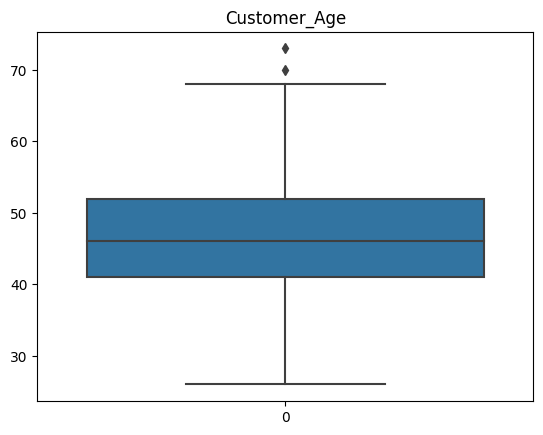

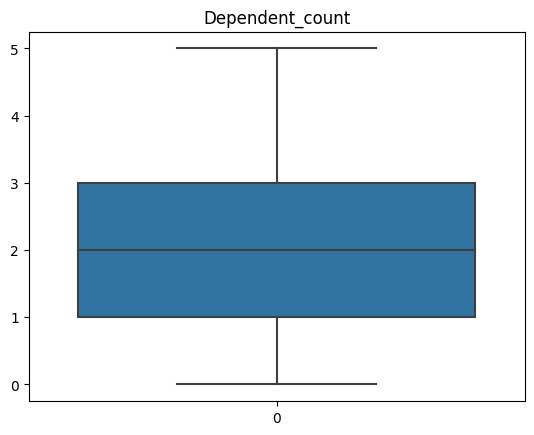

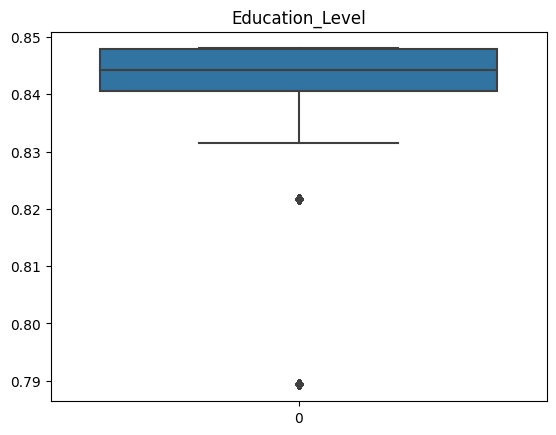

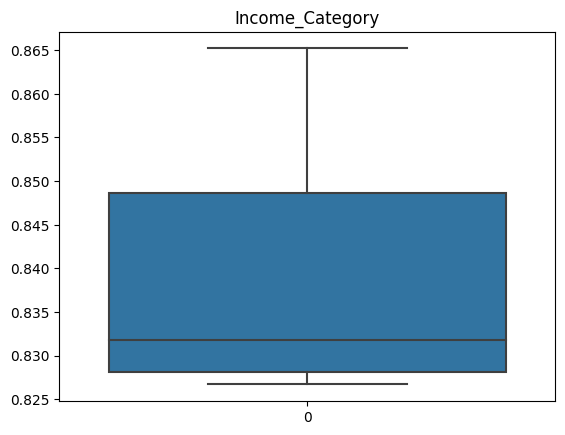

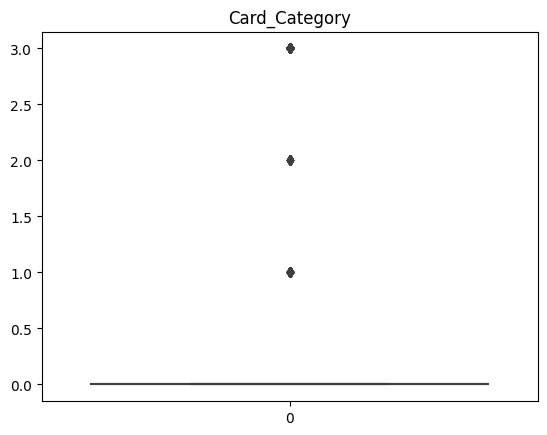

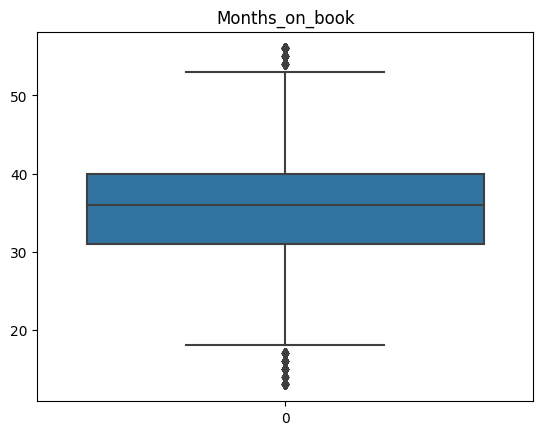

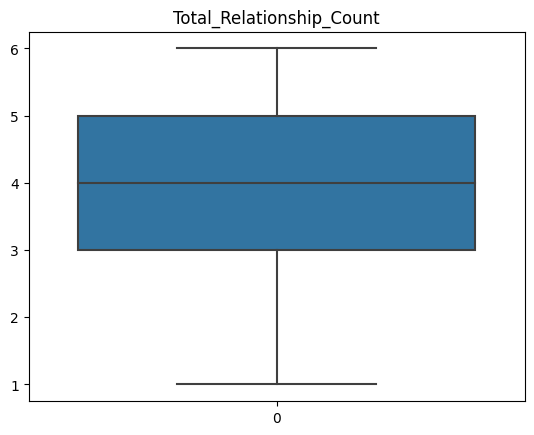

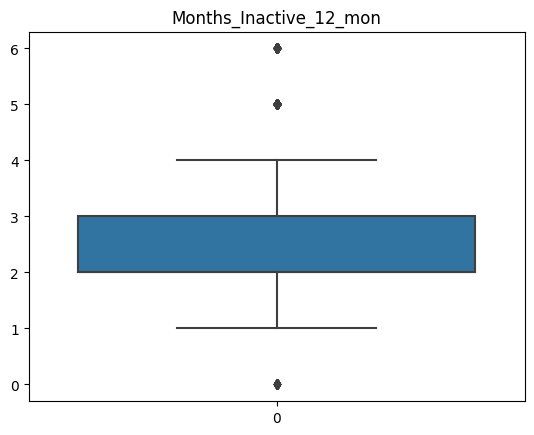

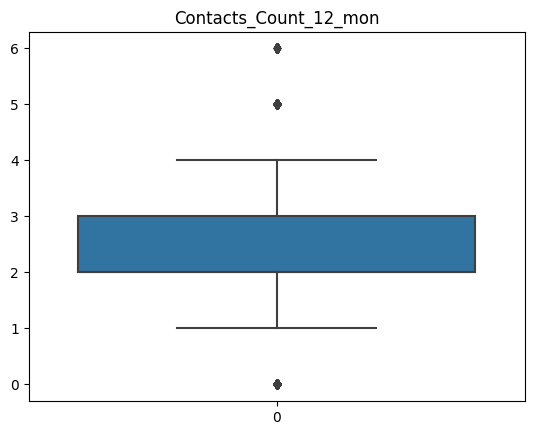

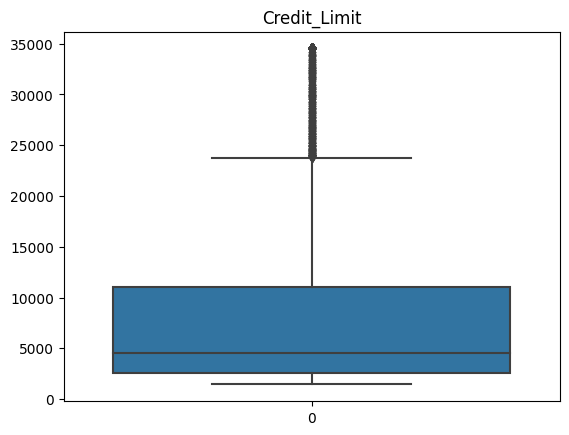

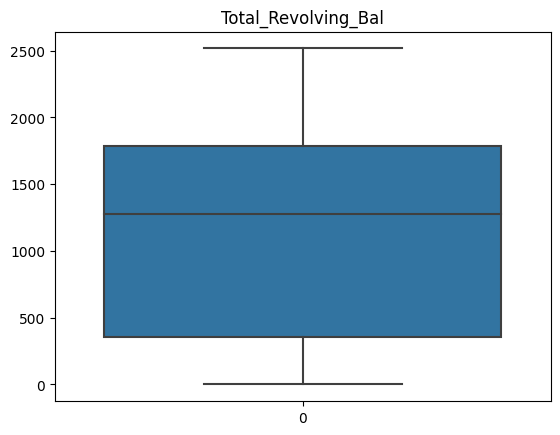

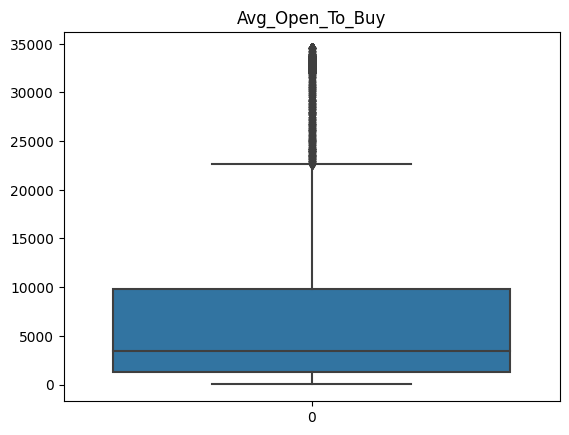

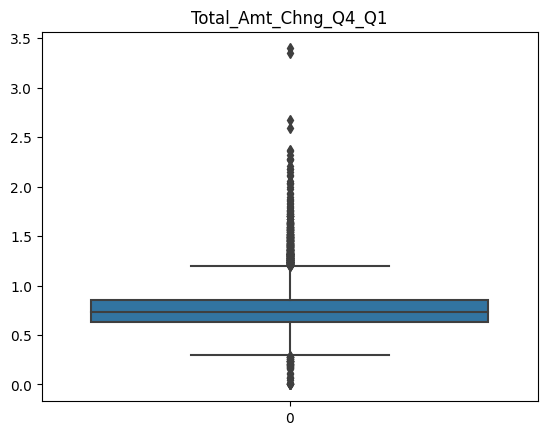

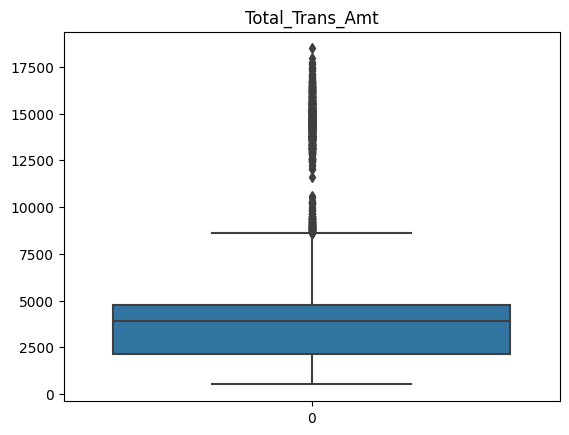

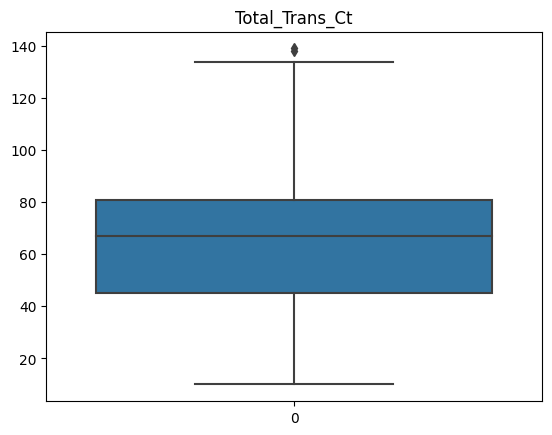

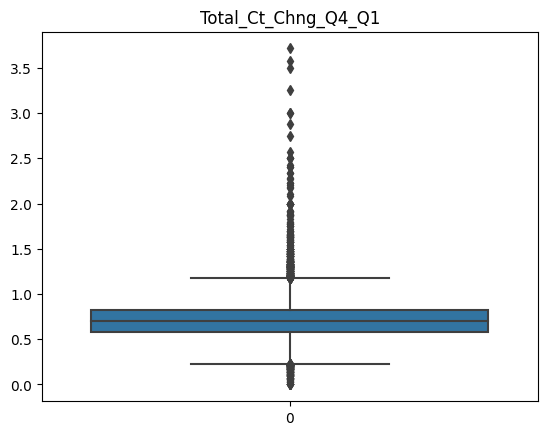

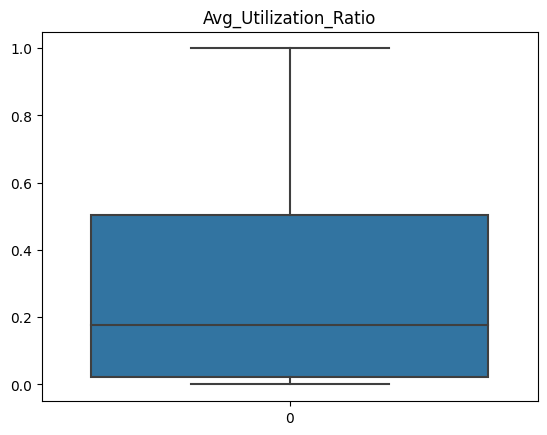

In [ ]:
#sns.boxplot(x=BankChurners['Education_Level'])
for i in lst:

  sns.boxplot(BankChurners[i])
  plt.title(i)
  plt.show()

In [ ]:
SD= StandardScaler()

In [ ]:
scale_columns = ['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal',
 'Avg_Open_To_Buy','Total_Trans_Amt','Total_Trans_Ct']


In [ ]:
BankChurners[scale_columns] = SD.fit_transform(BankChurners[scale_columns])

In [ ]:
TTS= train_test_split

In [ ]:
# X= BankChurners[X_dep]
# y= BankChurners['Attrition_Flag']
X= BankChurners.iloc[:,1:]
y= BankChurners.iloc[:, 0]

In [ ]:
X_train, X_test, y_train, y_test= TTS(X, y, train_size = 0.8, random_state= 0)

In [ ]:
X_train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
147,1.082034,1,2,0.844309,0.826685,0.0,1.762028,3,2,0,0.251316,0.457927,0.210210,1.317,-0.827824,-1.314735,1.000,0.141,1,0,0
1985,-1.787077,1,0,0.844309,0.831835,0.0,-1.118005,6,3,3,0.066684,-1.426858,0.194589,0.809,-0.554050,0.133835,0.478,0.000,0,1,0
8316,-1.412845,0,4,0.840619,0.831835,0.0,-1.368442,2,3,2,-0.577989,-0.706566,-0.514523,0.670,0.211046,0.645096,0.702,0.174,1,0,0
2841,-0.789126,0,2,0.831468,0.828138,0.0,0.008965,3,1,1,-0.389395,1.488668,-0.522774,0.822,-0.607333,-0.334820,0.541,0.467,1,0,0
5824,-0.165406,0,4,0.847988,0.848603,0.0,0.008965,5,2,1,-0.625412,1.311970,-0.742900,0.858,-0.226404,0.602491,0.580,0.757,1,0,0


In [ ]:
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred= LR.predict(X_test)

In [ ]:
y_pred

array([1.07168792, 0.31360155, 0.86215841, ..., 0.58404849, 1.0513673 ,
       0.94418753])

In [ ]:
# threshold value
threshold = 0.5

In [ ]:
#np.where('expression', 'True', 'False')
np.where(y_pred > threshold , 1, 0 )

array([1, 0, 1, ..., 1, 1, 1])